## Libraries Used

In [1]:
# %pip install pandas matplotlib seaborn  nltk textblob vaderSentiment wordcloud

# Data Handling
import pandas as pd
import numpy as np

# # Text Processing
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Display Formatting
from IPython.display import display

## Dataset extraction and organization
### Load and combine all datasets

In [2]:
import pandas as pd # for dataframes
from IPython.display import display # for display

# Load datasets
dataset1 = pd.read_csv('data/amazon_cells_labelled.txt', delimiter='\t', header=None, names=['Review', 'Sentiment'])
dataset2 = pd.read_csv('data/imdb_labelled.txt', delimiter='\t', header=None, names=['Review', 'Sentiment'])
dataset3 = pd.read_csv('data/yelp_labelled.txt', delimiter='\t', header=None, names=['Review', 'Sentiment'])

# Combine datasets
combined_dataset = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)

# Ensure correct column ordering
combined_dataset = combined_dataset[['Review', 'Sentiment']]

# Convert Sentiment column to a centered string format 
combined_dataset["Sentiment"] = combined_dataset["Sentiment"].astype(str).apply(lambda x: f"{x:^5}")

# Display first 10 rows
display(combined_dataset.head(10)) 




,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


## Data Cleaning and Preparation




#### Load and basic cleaning

In [3]:
# import re
# import string
# import nltk
# from textblob import TextBlob
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet

# # Download required nltk data
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Removing duplicates
combined_dataset = combined_dataset.drop_duplicates(subset=['Review'])

# Checking for missing values
print(combined_dataset.isnull().sum().to_string())

# Converting to lowercase
combined_dataset['Review'] = combined_dataset['Review'].str.lower()



Review       0
Sentiment    0


#### Normalize Contractions

In [4]:
import contractions

def normalize_contractions(text):
    """Expands contractions using the contractions library."""
    return contractions.fix(text) if isinstance(text, str) else text

# Apply to dataset
combined_dataset['Review'] = combined_dataset['Review'].apply(normalize_contractions)

#### Remove Punctuation, Special Characters, and Numbers

In [5]:
import string 
# using `.translate()` for fast standard punctuation removal
combined_dataset['Review'] = combined_dataset['Review'].str.translate(str.maketrans('', '', string.punctuation))

# using `.str.replace()` to remove any remaining Unicode punctuation
combined_dataset['Review'] = combined_dataset['Review'].str.replace(r'[^\w\s]', '', regex=True)

# Removing special characters & numbers
combined_dataset['Review'] = combined_dataset['Review'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Normalizing spaces
combined_dataset['Review'] = combined_dataset['Review'].str.strip().replace(r'\s+', ' ', regex=True)

# Removing non-ASCII characters
combined_dataset['Review'] = combined_dataset['Review'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8') if isinstance(x, str) else x)


#### Remove Stopwords

In [21]:


# Tokenization and Stopwords Removal

# from textblob import TextBlob
# from nltk.corpus import stopwords
# import pandas as pd

# # Define stopwords set
# stopwords_set = set(stopwords.words("english"))

# # Function: Tokenization + Stopwords Removal (Returns List)
# def tokenize_and_remove_stopwords(text):
#     if isinstance(text, str): # ensure it's a string
#         cleaned_tokenized_text = []
#         blob = TextBlob(text)  # Create a TextBlob object
#         for word in blob.words:
#             if word.lower() not in stopwords_set:
#                cleaned_tokenized_text.append(word.lower())
            
#         return cleaned_tokenized_text  # Return as a list
#     return text

# # Apply function to dataset
# combined_dataset["Tokenized_Review"] = combined_dataset["Review"].apply(tokenize_and_remove_stopwords)

# # Display the updated dataset
# # print(combined_dataset[["Review", "Tokenized_Review"]])
# combined_dataset['Tokenized_Review'].head()






# # Just tokenization

# from textblob import TextBlob
# import pandas as pd

# # Function: Tokenization (Returns List)
# def tokenize_text(text):
#     if isinstance(text, str):  # ensure it's a string
#         blob = TextBlob(text)  # Create a TextBlob object
#         return [word.lower() for word in blob.words]  # Tokenize and convert to lowercase
#     return text

# # Apply function to dataset
# combined_dataset["Just_Tokenized_Review"] = combined_dataset["Review"].apply(tokenize_text)

# # Display the updated dataset
# combined_dataset['Just_Tokenized_Review'].head()







# Just removing soptwords

from nltk.corpus import stopwords

# Define stopwords set
stopwords_set = set(stopwords.words("english"))

# Function: Remove Stopwords (Returns Cleaned Sentence)
def remove_stopwords(text):
    if isinstance(text, str):  # Ensure it's a string
        words = text.split()  # Split into words (without tokenizing)
        cleaned_text = " ".join([word for word in words if word.lower() not in stopwords_set])
        return cleaned_text  # Return cleaned sentence
    return text

# Apply function to dataset
combined_dataset["Just_Stopwords_Removed_Review"] = combined_dataset["Review"].apply(remove_stopwords)

# Display the updated dataset
combined_dataset["Just_Stopwords_Removed_Review"].head()







0                      way plug us unless go converter
1                            good case excellent value
2                                        great jawbone
3    tied charger conversations lasting minutesmajo...
4                                            mic great
Name: Just_Stopwords_Removed_Review, dtype: object

 #### Correct Spelling

In [142]:
# from spellchecker import SpellChecker

# # initialize the spell checker
# spell = SpellChecker()

# def correct_spelling(tokens):
#     if isinstance(tokens, list): # ensure it's a list of words
#         corrected_tokens = [] #initialize emmpty list
#         for word in tokens:
#             corrected_word = spell.correction(word) # correc the word
#             if corrected_word is None: # if no correction found
#                 corrected_word = word # use the original word
#             corrected_tokens.append(corrected_word) # Append to new list
#         return corrected_tokens # return the corrected list of words
#     return tokens # return the original list of words

# combined_dataset["Tokenized_Review"] = combined_dataset["Tokenized_Review"].apply(correct_spelling)

# combined_dataset["Tokenized_Review"].head(10)

#### Lemmatization

In [143]:
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()

# def lemmatize_text(tokens):
#     if isinstance(tokens, list):
#         corrected_tokens = [] #initialize emmpty list
#         for word in tokens:
#             corrected_word = lemmatizer.lemmatize(word)
#             corrected_tokens.append(corrected_word)
#         return corrected_tokens
#     return tokens
            


# combined_dataset['Tokenized_Review'] = combined_dataset['Tokenized_Review'].apply(lemmatize_text)


## Exploratory Data Analysis
### Visualizing and analyzing sentiment distribution.

### Use bar charts 
>to show positive vs. negative sentiments.

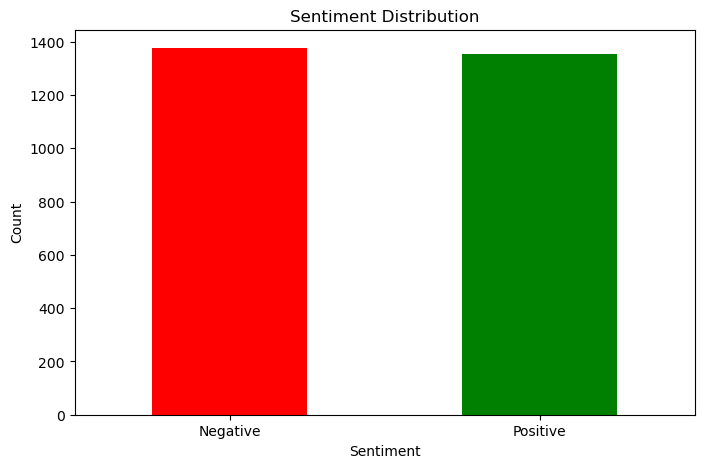

In [121]:

# Count sentiment occurrences
sentiment_counts = combined_dataset['Sentiment'].value_counts()

# Plot the sentiment distribution
sentiment_counts.plot(kind="bar", color=["red", "green"], figsize=(8,5))

# Set labels
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"], rotation=0)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")

# Show plot
plt.show()

### Distribution of review lengths
>Histogram showing text lenght distribution

In [122]:
print((combined_dataset["Tokenized_Review"].apply(len)).describe())


count    2731.000000
mean       13.068473
std        33.919136
min         0.000000
25%         6.000000
50%        10.000000
75%        16.000000
max      1301.000000
Name: Tokenized_Review, dtype: float64


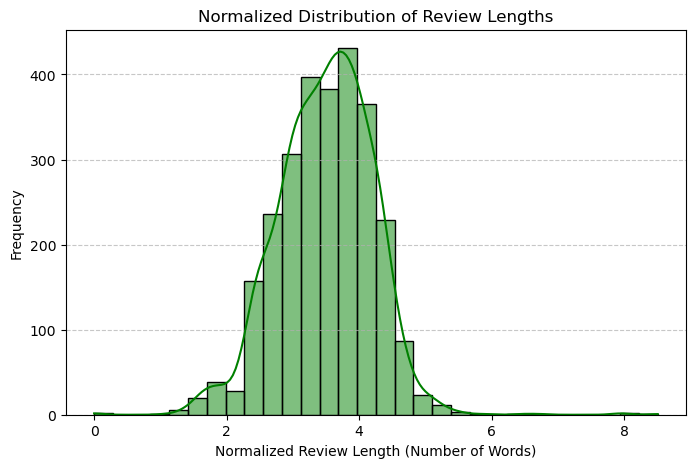

In [139]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# Apply log transformation to normalize review length distribution
Normalized_Review_Length = np.log1p(combined_dataset["Tokenized_Review"].apply(len))  # log1p avoids log(0) error

# Plot histogram of log-transformed review lengths
plt.figure(figsize=(8, 5))
sns.histplot(Normalized_Review_Length, bins=30, kde=True, color="green", edgecolor="black")
plt.xlabel("Normalized Review Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Normalized Distribution of Review Lengths")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [83]:
print(combined_dataset.columns)

Index(['Review', 'Sentiment', 'Tokenized_Review', 'Log_Review_Length'], dtype='object')


### Word Cloud for Most Frequent Word
>Generating word clouds for both positive and negative sentiments

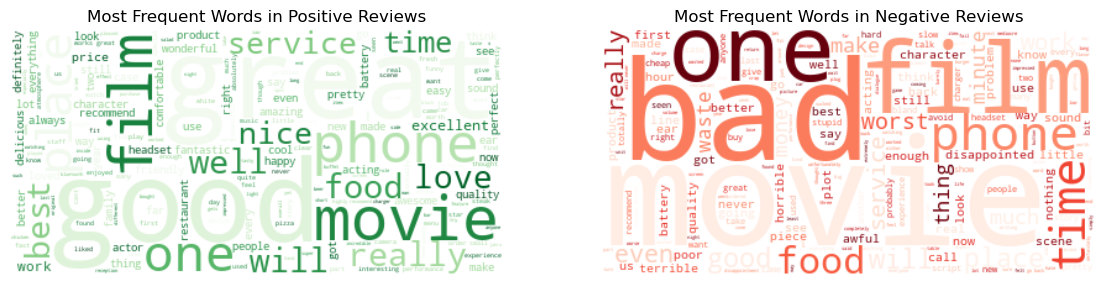

In [90]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS) # stop words to avoid repetition
custom_stopwords = {"wa"} # the word "wa" kept appearing the cloud
stopwords.update(custom_stopwords)

wc_positive = WordCloud(background_color="white", max_words=200, stopwords=stopwords, colormap="Greens") # assign cloud with green for postive reviews 
wc_negative = WordCloud(background_color="white", max_words=200, stopwords=stopwords, colormap="Reds") # assign cloud with red for negative reviews
positive_wc = wc_positive.generate(' '.join(combined_dataset[combined_dataset['Sentiment'].str.strip() == '1']['Review'])) # get postive reviews from dataset using the 1 indicator
negative_wc = wc_negative.generate(' '.join(combined_dataset[combined_dataset['Sentiment'].str.strip() == '0']['Review'])) # get negative reviews from dataset using the 0 indicator

# word cloud plotting
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation="bilinear") # use bilinear interpolation to make the wordclouds look more clear
plt.axis("off")
plt.title("Most Frequent Words in Positive Reviews")

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Negative Reviews")
plt.show()


### Term Frequency Analysis
>Identifing most common words in positive and negative reviews.

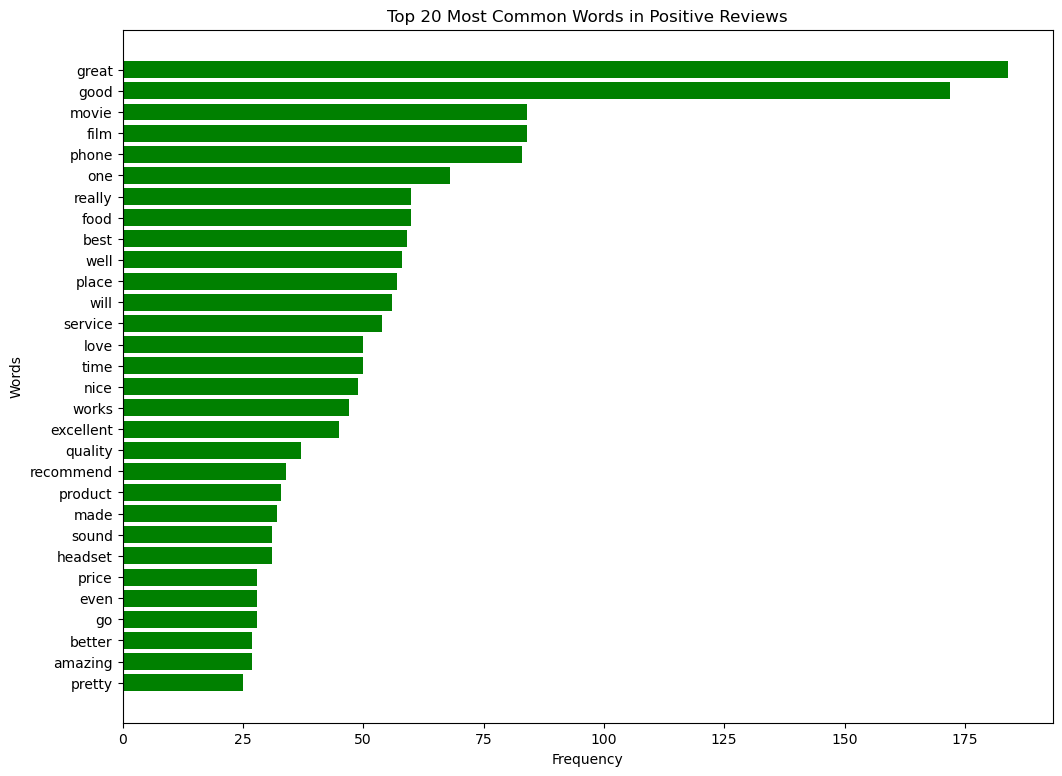

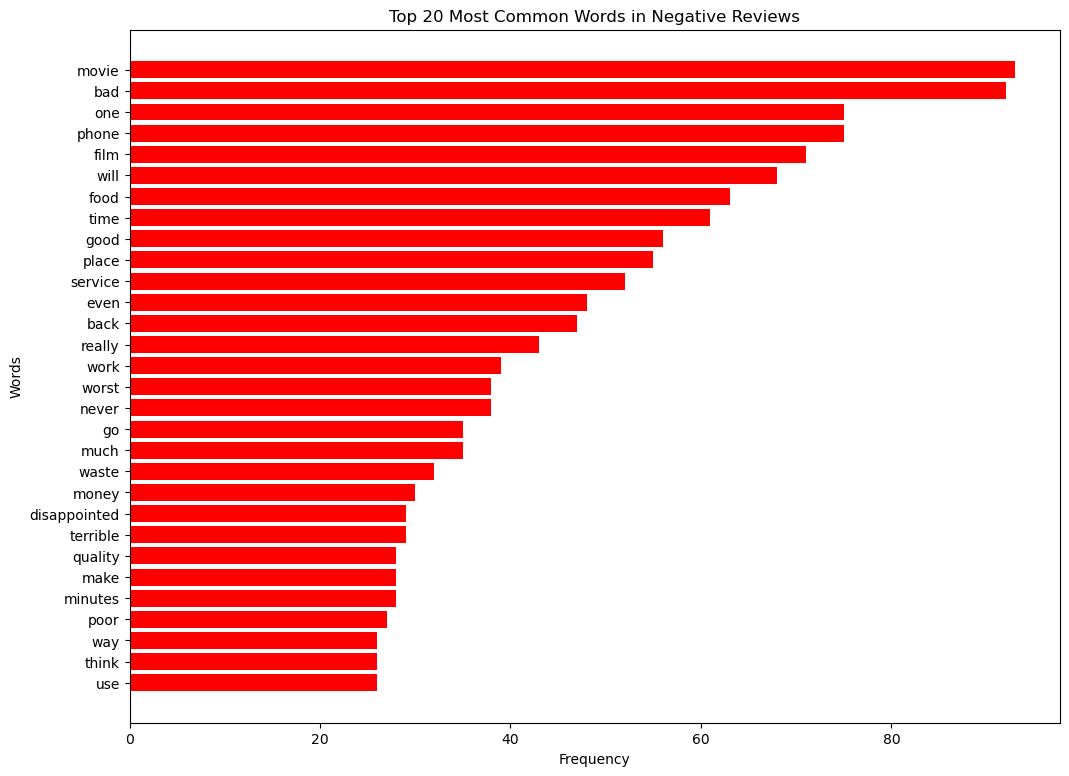

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter # import Counter to count word frequencies

stopwords = set(STOPWORDS) # stop words to avoid repetition
stopwords.update(custom_stopwords)

def remove_stopwords(text): # function to remove stopwords from dataset 
    return ' '.join(word for word in text.split() if word not in stopwords)

combined_dataset['Review'] = combined_dataset['Review'].apply(remove_stopwords) # apply removal function

# Tokenize words from positive and negative reviews 
positive_words = ' '.join(combined_dataset[combined_dataset['Sentiment'].str.strip() == '1']['Review']).split() # get postive reviews from dataset using the 1 indicator
negative_words = ' '.join(combined_dataset[combined_dataset['Sentiment'].str.strip() == '0']['Review']).split() # get negative reviews from dataset using the 0 indicator


positive_word_freq = Counter(positive_words) # count positive words
negative_word_freq = Counter(negative_words) # count negative words
top_positive_words = positive_word_freq.most_common(30) # get the top 30 most used words in positive reviews
top_negative_words = negative_word_freq.most_common(30) # get the top 30 most used words in negative reviews

df_positive = pd.DataFrame(top_positive_words, columns=['Word', 'Frequency']) # DF for positive words
df_negative = pd.DataFrame(top_negative_words, columns=['Word', 'Frequency']) # DF for negative words

# plotting
plt.figure(figsize=(12, 9))
plt.barh(df_positive['Word'], df_positive['Frequency'], color='green')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Common Words in Positive Reviews")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12, 9))
plt.barh(df_negative['Word'], df_negative['Frequency'], color='red')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Common Words in Negative Reviews")
plt.gca().invert_yaxis()
plt.show()

## Model Selection


 ### Vader
 >Leveraging a rule-based model to assess sentiment.

#### Vader implementation

VADER Model Accuracy: 0.79
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1355
           1       0.78      0.81      0.79      1376

    accuracy                           0.79      2731
   macro avg       0.79      0.79      0.79      2731
weighted avg       0.79      0.79      0.79      2731



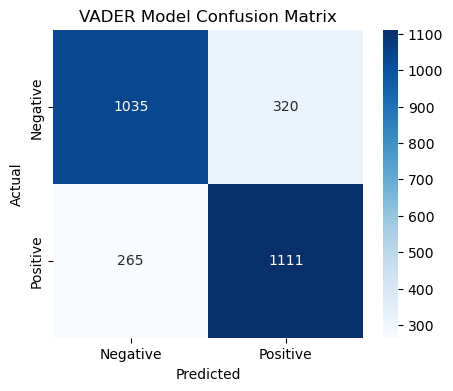

Review: This product is really cool
Predicted Sentiment: Positive
Sentiment Score: 0.38

Review: This movie sucked
Predicted Sentiment: Negative
Sentiment Score: -0.46

Review: I hate this
Predicted Sentiment: Negative
Sentiment Score: -0.57

Review: Had a really good time
Predicted Sentiment: Positive
Sentiment Score: 0.49

Review: My son and I thought it was just okay
Predicted Sentiment: Positive
Sentiment Score: 0.23

Review: Where can I see more of this?
Predicted Sentiment: Negative
Sentiment Score: 0.00



In [22]:

# import the required libraries:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# # Convert sentiment to categorical labels (0 = Negative, 1 = Positive)
combined_dataset['Sentiment'] = combined_dataset['Sentiment'].astype(int)


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to each review and get compound score

# Review
# Tokenized_Review
# Just_Tokenized_Review
# Just_Stopwords_Removed_Review
combined_dataset['VADER_compound'] = combined_dataset['Just_Stopwords_Removed_Review'].apply(lambda review: analyzer.polarity_scores(review)['compound']) #  or Review 

# Convert VADER scores into binary sentiment labels
combined_dataset["VADER_Prediction"] = combined_dataset["VADER_compound"].apply(lambda score: 1 if score >= 0.05 else 0)



# Test with a Custom Sentence
def predict_sentiment_vader(text):
    score = analyzer.polarity_scores(text)['compound']
    sentiment = "Positive" if score >= 0.05 else "Negative"
    return sentiment, score






# Calculate accuracy
accuracy =accuracy_score(combined_dataset['Sentiment'], combined_dataset['VADER_Prediction'])
print(f"VADER Model Accuracy: {accuracy:.2f}")

# # Show classification report
print("Classification Report:", classification_report(combined_dataset['Sentiment'], combined_dataset['VADER_Prediction']))


# plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(combined_dataset['Sentiment'], combined_dataset["VADER_Prediction"]), annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("VADER Model Confusion Matrix")
plt.show()



dummy_reviews= [
    "This product is really cool",
    "This movie sucked",
    "I hate this",
    "Had a really good time",
    "My son and I thought it was just okay",
    "Where can I see more of this?"
]

for review in dummy_reviews:
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predict_sentiment_vader(review)[0]}")
    print(f"Sentiment Score: {predict_sentiment_vader(review)[1]:.2f}\n")


#### Testing Vader Model

### Logisitic Regression 
>Training a supervised learning model for sentiment classification

In [103]:
stopwords = set(STOPWORDS) 

def remove_stopwords(text): # function to remove stopwords from dataset 
    return ' '.join(word for word in text.split() if word not in stopwords)

combined_dataset['Review'] = combined_dataset['Review'].apply(remove_stopwords) # apply removal function


vectorizer = TfidfVectorizer(max_features=10000) # keep top 10k words
x = vectorizer.fit_transform(combined_dataset['Review']) # create TF-IDF matrix
y = combined_dataset['Sentiment'] # target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # splitting data so we can train model 


model = LogisticRegression() # initialize
model.fit(x_train, y_train) # train model
y_pred = model.predict(x_test) # predict on our data
accuracy = accuracy_score(y_test, y_pred) # calculate accuracy
accuracy = accuracy*100 # convert to percentage
print(f"Accuracy: {accuracy:.2f}%")


def predict_sentiment(text): # creating function to predict sentiment (0 = negative, 1 = positive) on some dummy data
    vectorized_text = vectorizer.transform([text])
    sentiment = model.predict(vectorized_text)[0]
    return sentiment

def sentiment_score(text): # creating function to see exactly how positive or negative a review is
    vectorized_text = vectorizer.transform([text])
    sentiment_score = model.decision_function(vectorized_text)[0]
    return sentiment_score

dummy_reviews= [
    "This product is really cool",
    "This movie sucked",
    "I hate this",
    "Had a really good time",
    "My son and I thought it was just okay",
    "Where can I see more of this?"
]

for review in dummy_reviews:
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predict_sentiment(review)}")
    print(f"Sentiment Score: {sentiment_score(review):.2f}\n")


Accuracy: 79.89%
Review: This product is really cool
Predicted Sentiment: 1
Sentiment Score: 1.27

Review: This movie sucked
Predicted Sentiment: 0
Sentiment Score: -0.62

Review: I hate this
Predicted Sentiment: 0
Sentiment Score: -0.95

Review: Had a really good time
Predicted Sentiment: 1
Sentiment Score: 1.48

Review: My son and I thought it was just okay
Predicted Sentiment: 1
Sentiment Score: 0.00

Review: Where can I see more of this?
Predicted Sentiment: 1
Sentiment Score: 0.39



## Model Analysis 


### VADER Evaluation 

### Threshold-Based Accuracy
>Measures how often VADER’s sentiment matches labels.

#### Mean Squared Error (MSE) 
>Measures how close VADER's scores are to actual sentiment.

#### Spearman/Pearson Correlation 
>Measures how well VADER scores align with actual sentiment.


### Logistic Regression

#### Confusion Matrix
>Essential for analyzing false positives and false negatives.

#### ROC Curve & AUC
>Measures classification performance across thresholds.

### Vader vs Logistic Regression Results

## Conclusion